# Desafio 1: Wikipédia com XPath

Neste desafio você irá acessar a página de artigos destacados da Wikipédia em português e coletar todos os artigos destacados e suas respectivas URLs.

Lembre-se que as Ferramentas de Desenvolvimento do Chrome são essenciais nesse desafio!


Antes de começar o desafio, [acesse o site](https://pt.wikipedia.org/wiki/Wikip%C3%A9dia:Artigos_destacados) para ir se familiarizando. A lista que queremos está localizada na caixa com título **Conteúdo**:

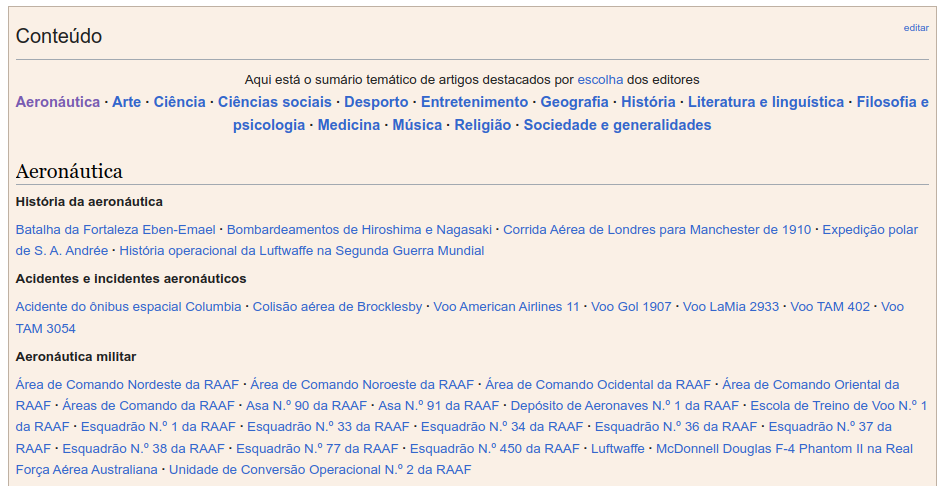

## Qual o nosso objetivo e como chegar lá?

Podemos ver que a lista de artigos é bem grande, e eles estão divididos por seções e subseções. Então, vamos **criar um conjunto de dados** com **todos os nomes dos artigos**, **suas URLs** e também **as seções e subseções** que eles pertencem.

Para chegar lá, vamos elaborar um possível passo-a-passo: 
1. Investigar a disposição dos elementos na página com o Inspetor de Elementos
2. Acessar a página dos artigos destacados com `requests_html`
3. Coletar as informações encontradas na página utilizando XPath
4. Salvar o conteúdo em CSV

Vamos lá?!

*Caso não tenha as bibliotecas utilizadas no desafio instaladas, descomente a célula abaixo e a execute*

In [ ]:
# !pip install requests_html pandas

## Investigando os elementos da página

Utilizando o Inspetor de Elementos, queremos inicialmente identificar qual elemento contém a lista completa.

Neste caso, o elemento que contém todos os outros é do tipo **`div`** e podemos identificá-la pela classe **`hlist`**.

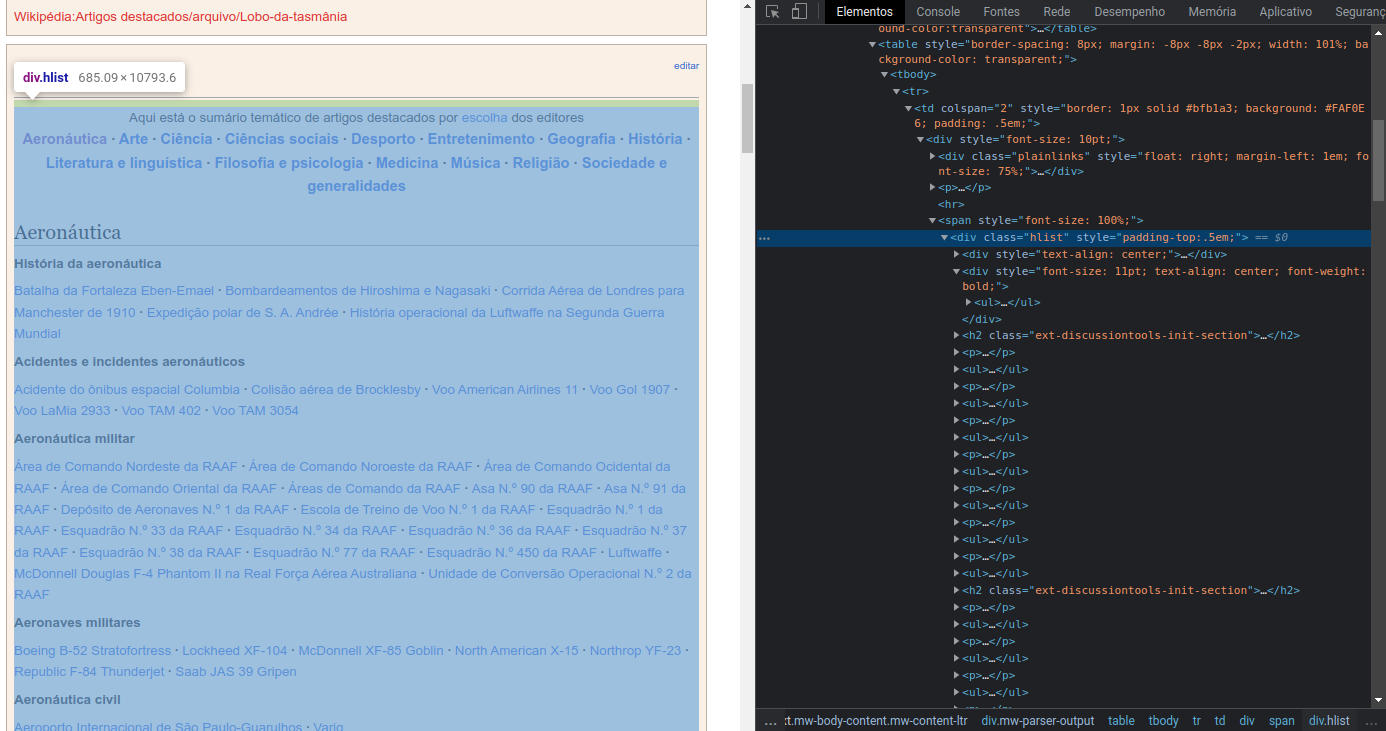

**Qual o XPath para selecionar este elemento `div` de classe `hlist` dentro do HTML da página?**

Resposta: `?`

E os elementos das seções, subseções, artigos e URL dos artigos, como conseguimos encontrá-los dentro dessa `div`?

**Qual tipo do elemento (exemplo: `div`, `p`, etc.) de uma seção (ex: Aeronáutica)?**:

Resposta: `?`


**Qual tipo do elemento de uma subseção (ex: História da aeronáutica)?**:

Resposta: `?`

**Qual tipo do elemento de uma artigo (ex: Batalha da Fortaleza Eben-Emael)?**:

Resposta: `?` e mais internamente, `?`

**Onde a URL do artigo se localiza dentro do elemento do artigo?**:

Resposta: No atributo `?` do elemento `?`

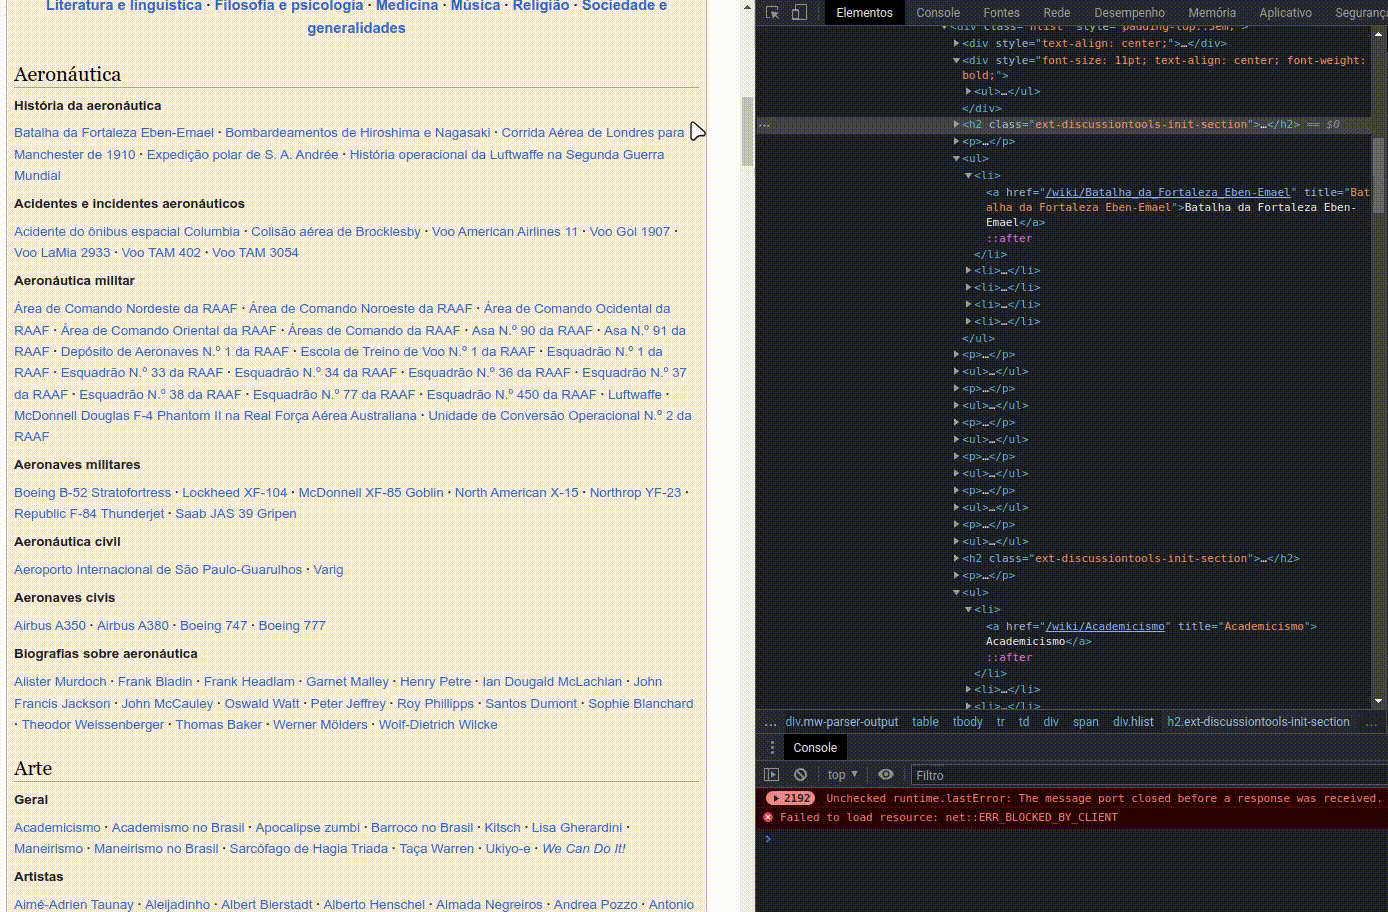

Agora já temos informações suficientes para começar nossa raspagem!

## Acessando a página

Precisaremos criar uma sessão (como se fosse uma sessão de navegação mesmo) para então requisitar a página dos artigos destacados.

Primeiro, vamos guardar a nossa URL da página em uma variável:

In [ ]:
url_artigos_destacados = "https://pt.wikipedia.org/wiki/Wikip%C3%A9dia:Artigos_destacados"

E então, podemos criar uma sessão e fazer a requisição:

In [ ]:
from requests_html import HTMLSession

In [ ]:
sessao = HTMLSession()
pagina_artigos_destacados = sessao.get(url_artigos_destacados)
type(pagina_artigos_destacados)

O tipo da resposta que obtemos é um `requests_html.HTMLResponse`, e esse objeto nos oferece alguns métodos e atributos. Se quisermos ler o HTML dessa resposta, por exemplo, o acessamos através do `.text`:

In [ ]:
type(pagina_artigos_destacados.text)

In [ ]:
pagina_artigos_destacados.text

Assim podemos validar se nossa requisição traz a resposta que esperamos, comparando os elementos do HTML recebido com o HTML original que observamos no navegador.

*Dica: aqui, usar a função `print()` imprime o html de forma um pouco mais legível*

In [ ]:
print(pagina_artigos_destacados.text)

## Coletando conteúdo da página

Primeiro, analisando novamente os elementos da página, podemos observar que o conteúdo dos artigos fica dentro de um elemento `table`. Vamos dar uma olhada nas tabelas que temos nessa página?

**Qual o XPath que deveríamos utilizar para encontrar todos os elementos `table` na página?**

Resposta: `?`

In [ ]:
xpath_tabelas = "?"

Com o método `.html.xpath()` podemos passar um xpath como argumento e teremos como retorno os elementos correspondentes àquela seleção:

In [ ]:
tabelas_na_pagina = pagina_artigos_destacados.html.xpath(xpath_tabelas)
type(tabelas_na_pagina)

Como sempre pode haver mais de um elemento na página (no caso, tabelas), o retorno é uma lista. Quantas elementos de tabela temos na página?

In [ ]:
len(tabelas_na_pagina)

Temos 4 tabelas, uma delas é a que contém os artigos destacados. Podemos ir vendo de uma a uma qual tem o conteúdo que queremos.

**Qual o índice da tabela que contém os artigos destacados?**

Resposta: ?

In [ ]:
indice_tabela = ?

In [ ]:
tabela_artigos_destacados = tabelas_na_pagina[indice_tabela]
type(tabela_artigos_destacados)

Agora vamos observar que o tipo do elemento não é mais `requests_html.HTMLResponse` e sim `requests_html.Element`. Ou seja, talvez os atributos e métodos disponíveis sejam diferentes.

Nesse caso, são diferentes sim. Por exemplo, para ver o conteúdo HTML do elemento agora utilizamos o atributo `.html`:

In [ ]:
tabela_artigos_destacados.html

E para selecionar elementos internos com XPath, utlizamos o método `.xpath()` diretamente:

In [ ]:
tabela_artigos_destacados.xpath("//div")

Da nossa investigação inicial, sabemos qual o XPath que seleciona o elemento que contém toda a lista de artigos destacados. Vamos armazená-lo em uma varíavel:

In [ ]:
xpath_elemento_contem_artigos = "?"

Podemos observar que todos os outros elementos são descendentes imediatos deste que estamos selecionando. Vamos então selecionar todos eles de uma vez, obtendo uma lista. Assim poderemos olhar um por um e distinguir se são seções, subseções ou artigos.

Para isso, vamos acrescentar `/*` ao nosso XPath, para selecionar todos os elementos descendentes imediatos:

In [ ]:
lista_artigos_destacados = tabela_artigos_destacados.xpath(f"{xpath_elemento_contem_artigos}/*")
lista_artigos_destacados

Podemos ver que os elementos correspondem ao que observamos na investigação inicial. Nos resta agora criar o nosso conjunto de dados.

Primeiro, vamos criar uma lista com todas as seções. Vamos armazenar em uma varíavel o tipo do elemento (exemplo: `div`, `p`, etc.) que anotamos na nossa investigação:

In [ ]:
tipo_secoes = '?'

Caso o elemento seja do tipo que corresponde a uma seção, vamos armazenar seu texto:

In [ ]:
secoes = []
for elemento in lista_artigos_destacados:
  if elemento.tag == tipo_secoes:
    secao = {"seção": elemento.text}
    secoes.append(secao)

secoes

Vamos descer mais um nível agora e armazenar as subseções também. Primeiro vamos armazenar o tipo do elemento:

In [ ]:
tipo_subsecoes = '?'

In [ ]:
subsecoes = []
ultima_secao = ''

for elemento in lista_artigos_destacados:
  if elemento.tag == tipo_secoes:
    ultima_secao = elemento.text
  elif elemento.tag == tipo_subsecoes:
    subsecao = {"seção": ultima_secao, "subseção": elemento.text}
    subsecoes.append(subsecao)

subsecoes

Vamos descer maaais ainda e armazenar os artigos agora. Primeiro vamos armazenar os tipos dos elementos:

In [ ]:
tipo_lista_artigos = '?'
tipo_elemento_artigo = '?'

In [ ]:
artigos = []
ultima_secao = ''
ultima_subsecao = ''

for elemento in lista_artigos_destacados:
  if elemento.tag == tipo_secoes:
    ultima_secao = elemento.text
  elif elemento.tag == tipo_subsecoes:
    ultima_subsecao = elemento.text
  elif elemento.tag == tipo_lista_artigos:
    for elemento_artigo in elemento.xpath(f"//{tipo_elemento_artigo}"):
      artigo = {"seção": ultima_secao, "subseção": ultima_subsecao, "artigo": elemento_artigo.text}
      artigos.append(artigo)

artigos

Note que precisamos realizar um `for` dentro de outro `for` nesse caso. Quando estamos iterando sobre os elementos no mesmo nível das seções e subseções nós encontramos elementos que são listas de artigos de determinada subseção. Então, para coletar cada artigo individualmente, temos que iterar por todos os elementos que compõem aquela lista.

Agora, se quisermos coletar as URLs, poderíamos buscar o atributo através de XPath.



**Com qual XPath poderíamos buscar a URL de um artigo?**

Resposta: `?`

In [ ]:
xpath_link = "?"

In [ ]:
artigos = []
ultima_secao = ''
ultima_subsecao = ''

for elemento in lista_artigos_destacados:
  if elemento.tag == tipo_secoes:
    ultima_secao = elemento.text
  elif elemento.tag == tipo_subsecoes:
    ultima_subsecao = elemento.text
  elif elemento.tag == tipo_lista_artigos:
    for elemento_artigo in elemento.xpath(f"//{tipo_elemento_artigo}"):
      url = elemento_artigo.xpath(xpath_link)
      artigo = {"seção": ultima_secao, "subseção": ultima_subsecao, "artigo": elemento_artigo.text, "artigo_url": url}
      artigos.append(artigo)

artigos

Podemos ver que ainda precisa de ajustes. Por exemplo, como o retorno do método `.xpath()` é uma lista, precisamos obter apenas o primeiro elemento. Além disso, o link é relativo, ou seja, ainda precisaria ser concatenado com `https://pt.wikipedia.org`.

In [ ]:
artigos = []
ultima_secao = ''
ultima_subsecao = ''

for elemento in lista_artigos_destacados:
  if elemento.tag == tipo_secoes:
    ultima_secao = elemento.text
  elif elemento.tag == tipo_subsecoes:
    ultima_subsecao = elemento.text
  elif elemento.tag == tipo_lista_artigos:
    for elemento_artigo in elemento.xpath(f"//{tipo_elemento_artigo}"):
      url = elemento_artigo.xpath(xpath_link)[0]
      artigo = {"seção": ultima_secao, "subseção": ultima_subsecao, "artigo": elemento_artigo.text, "artigo_url": f"https://pt.wikipedia.org{url}"}
      artigos.append(artigo)

artigos

## Salvando os itens

Com a nossa base de dados preenchida, podemos salvá-la! Primeiro, uma maneira de salvar itens em CSV utilizando a biblioteca `csv` que já vem com o Python:

In [ ]:
import csv

In [ ]:
with open('artigos_destacados.csv', 'w') as arquivo_csv:  # Abrindo um arquivo em modo de escrita
  colunas = artigos[0].keys()  # Indicando o nome das colunas a partir do primeiro item da nossa lista
  escritor_csv = csv.DictWriter(arquivo_csv, fieldnames=colunas)  # Declarando um objeto que escreve CSV no arquivo determinado e com as colunas indicadas
  escritor_csv.writeheader()  # Escrevendo o cabeçalho no CSV
  for linha in artigos:
    escritor_csv.writerow(linha)  # Para cada item da lista, escrever uma linha no CSV

Veja o arquivo `artigos_destacados.csv` que foi criado. Temos nossa primeira base de dados criada!

**Dica**: também podemos escrever o CSV sem usar um `for`, com o método `.writerows()`

In [ ]:
with open('artigos_destacados.csv', 'w') as arquivo_csv:
  colunas = artigos[0].keys()
  escritor_csv = csv.DictWriter(arquivo_csv, fieldnames=colunas)
  escritor_csv.writeheader()
  escritor_csv.writerows(artigos)  # Realiza a mesma tarefa que fazíamos antes, mas nesse método podemos passar a lista completa como argumento

Com isso já temos mais confiança que conseguimos coletar dados e armazená-los. Isso já nos abre um mundo de possibilidades!

## Utilizando Pandas

Como já vimos nos módulos anteriores, a biblioteca `pandas` é muito útil para manipular dados. Aqui, também podemos utilizá-la caso nossa base de dados precise de alguma manipulação antes de a salvarmos.

In [ ]:
import pandas as pd

Converter nossa lista de artigos em um `DataFrame` é muito simples, já que é uma lista de dicionários:

In [ ]:
artigos_df = pd.DataFrame(artigos)
artigos_df

Aqui já temos um `DataFrame` e poderíamos aplicar os conhecimentos que aprendemos anteriormente!

E, após fazer quaisquer manipulações desejadas, salvar em CSV é muito simples com o método `.to_csv()`:

In [ ]:
artigos_df.to_csv('artigos_destacados_pandas.csv')

Observem o arquivo gerado, a única diferença é que a coluna do índice está presente. Podemos fazer com que ela não seja escrita, se for o caso:

In [ ]:
artigos_df.to_csv('artigos_destacados_pandas.csv', index=False)

Com isso, podemos ver que os arquivos gerados com a biblioteca `csv` e `pandas` são idênticos!

Agora, já que estamos usando `pandas` também poderíamos tentar usar o `.read_html()` que aprendemos. Será que funciona?

In [ ]:
tabelas_artigos_destacados = pd.read_html(url_artigos_destacados)
tabelas_artigos_destacados

Podemos ver que algumas tabelas foram encontradas na página. A que desejamos é a de índice número 3:

In [ ]:
tabelas_artigos_destacados[3]

O `DataFrame` tem duas colunas e uma linha, e não nos diz muita coisa. Vamos observar a primeira linha um pouco mais de perto:

In [ ]:
tabelas_artigos_destacados[3].iloc[0]

Ainda não ajuda. Vamos selecionar a coluna 0 dessa linha e ver seu conteúdo:

In [ ]:
tabelas_artigos_destacados[3].iloc[0][0]

Podemos ver que o conteúdo textual está aqui, mas sem nenhuma hierarquia ou algo do tipo. Será que a coluna 1 ajuda?

In [ ]:
tabelas_artigos_destacados[3].iloc[0][1]

A mesma coisa...

Por fim notamos que algumas abordagens podem não funcionar sempre. Nesse caso, o `.read_html()` funciona quando a `table` em HTML é bem formatada, ou seja, possui elementos como `tbody`, `thead`, `tr` e `td`. Não é o nosso caso, então a coleta dos dados não funciona.

Em práticas futuras, testar com o `.read_html()` é sempre uma ótima opção inicial, pois é a abordagem mais fácil e simples. Caso não funcione, vamos para abordagens um pouco mais complexas e específicas como a de escrever um algoritmo de raspagem com `requests_html`.

Algumas vezes precisaremos de mais eficiência, então utilizaremos Scrapy. Ou então precisaremos de um simulador de navegador como Selenium. Mas pra grande maioria dos casos, o que aprendemos até agora já é suficiente!

## Finalizando o desafio!

Se tiver curiosidade e quiser tentar fazer a coleta dos textos introdutórios de cada artigo, seria uma ÓTIMA prática. Raspagem de dados vai ficando muito mais fácil com mais experiências e mais práticas.

Boa jornada!